## Exploratory Data Analysis (EDA): IMDB Movie Dataset

Trong notebook này, chúng ta sẽ khám phá bộ dữ liệu IMDB Movie Dataset lấy từ Kaggle:  
https://www.kaggle.com/ashirwadsangwan/imdb-dataset

Phương pháp sử dụng là EDA, phương pháp này phân tích dữ liệu chủ yếu sử dụng các kỹ thuật về biểu đồ, hình vẽ, bảng biểu.  

Dataset bao gồm 5 bảng như sau:

- title.basics.tsv.gz
- title.akas.tsv.gz
- title.principals.tsv.gz
- name.basics.tsv.gz
- title.ratings.tsv.gz

5 bảng này là các gzipped files (tab-separated values) được download từ Kaggle và lưu trong máy tính cá nhân.  
Mục đích của bài là show ra các insight liên quan đến công nghiệp phim ảnh từ quá khứ đến hết năm 2019

Đầu tiên, import các thư viện cần thiết:

In [1]:
import gzip
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

## 1. Bảng title.basics.tsv.gz - Bao gồm các thông tin sau:
- tconst (string) - ID nhận biết riêng của từng phim/chương trình
- titleType (string) – loại phát sóng của chương trình (e.g. movie, short, tvseries, tvepisode, video, etc).
- primaryTitle (string) – Tên chính thức của chương trình, đây là tên mà được sử dụng trong việc quảng bá khi chương trình được phát hành
- originalTitle (string) - Tên gốc của chương trình (sử dụng ngôn ngữ gốc).
- isAdult (boolean) - 0: phim không có yếu tố người lớn, 1: phim có yếu tố người lớn
- startYear (YYYY) – Năm phát hành. Đối với TVseries thì trường này là năm bắt đầu công chiếu của phim
- endYear (YYYY) – đối với TVseries thì đây là năm kết thúc, đối với các thể loại khác: Null values
- runtimeMinutes – Thời lượng phát sóng (tính bằng phút)
- genres (string array) – Thể loại chương trình (gồm nhiều nhất 3 loại/1 phim)

In [2]:
TitleBasics = pd.read_csv(r"C:/Users/User/Desktop/Kaggle_movie_dataset/title.basics.tsv.gz",sep="\t", low_memory=True, 
                          na_values=["\\N","nan"], compression='gzip',error_bad_lines = False,
                         dtype={'startYear':np.float64,'endYear':np.float64})
TitleBasics

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,NaN,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
6326540,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010.0,NaN,NaN,"Action,Drama,Family"
6326541,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010.0,NaN,NaN,"Action,Drama,Family"
6326542,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010.0,NaN,NaN,"Action,Drama,Family"
6326543,tt9916856,short,The Wind,The Wind,0,2015.0,NaN,27,Short


Bảng này bao gồm hơn 6 triệu dòng, tương ứng với hơn 6 triệu phim/chương trình được làm từ trước đến giờ

In [11]:
TitleBasics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6326545 entries, 0 to 6326544
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         int64  
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(2), int64(1), object(6)
memory usage: 434.4+ MB


Ta chia hơn 6 triệu chương trình theo tỷ lệ phần trăm được sản xuất sử dụng pie chart:

Text(0.5, 1.0, 'Percentage of Title Type Produced')

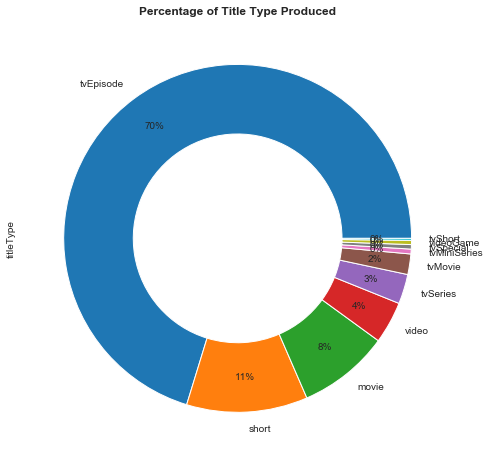

In [7]:
TitleBasics.titleType.value_counts().plot.pie(autopct="%.0f%%",figsize=(8,8),pctdistance=0.8, wedgeprops=dict(width=0.4))
plt.title('Percentage of Title Type Produced',fontweight='bold')

Kết quả hiển thị trên pie chart cho thấy:
- 70% chương trình được sản xuất là tvEpisode
- 11% là phim ngắn
- Phim chiếu rạp (movie) chỉ chiếm tổng cộng 8%

Điều này không khó để giải thích do xem truyền hình vẫn là nhu cầu hằng ngày của con người, trong khi phim chiếu rạp chỉ được xem khi có dịp.

Tiếp theo, nếu chia tỷ lệ theo thể loại phim thì sao:

Text(0.5, 1.0, 'Percentage of Title Genres Produced')

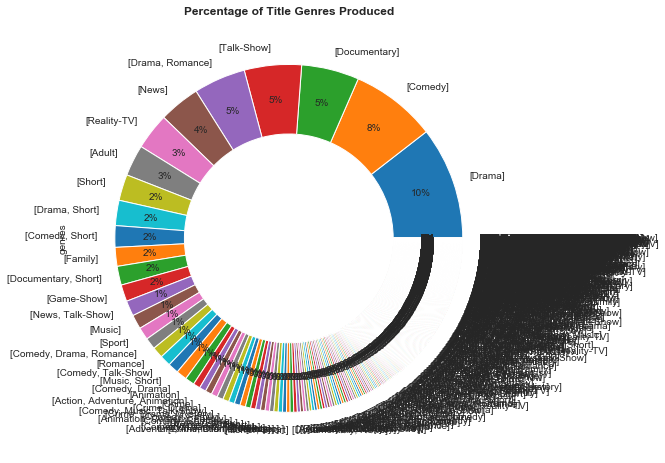

In [8]:
TitleBasics.genres.value_counts().plot.pie(autopct="%.0f%%",figsize=(8,8),pctdistance=0.8, wedgeprops=dict(width=0.4))
plt.title('Percentage of Title Genres Produced',fontweight='bold')

Có rất nhiều thể loại phim được liệt kê trong pie chart do chart này được vẽ theo cột 'genre' của bảng TitleBasics. Mỗi dòng của cột này lại là tổng hợp của từ 1 đến 3 thể loại khác nhau tương ứng với đặc điểm từng phim.

Do vậy để show rõ ràng hơn từng thể loại riêng biệt xem thể loại nào được sản xuất nhiều nhất, ta cần tách từng thể loại trong từng dòng của cột này rồi tính tổng số lần xuất hiện của mỗi thể loại.

Ta làm theo các bước sau:

In [4]:
# Split mỗi dòng của cột genres thành 1 list với các phần tử là từng thể loại khác nhau. Sau đó tạo 1 bảng copy từ bảng TitleBasics

TitleBasics['genres']=TitleBasics.genres.str.split(',')
Titleimdb=TitleBasics.copy()
Titleimdb

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"[Documentary, Short]"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"[Animation, Short]"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4,"[Animation, Comedy, Romance]"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,NaN,"[Animation, Short]"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,"[Comedy, Short]"
...,...,...,...,...,...,...,...,...,...
6326540,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010.0,NaN,NaN,"[Action, Drama, Family]"
6326541,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010.0,NaN,NaN,"[Action, Drama, Family]"
6326542,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010.0,NaN,NaN,"[Action, Drama, Family]"
6326543,tt9916856,short,The Wind,The Wind,0,2015.0,NaN,27,[Short]


In [5]:
# Tạo list genrelist là tổng hợp tất cả các thể loại từ tất cả các dòng của cột genres (các phần tử bên trong có lặp lại)

genrelist=[]

for list1 in Titleimdb['genres'].dropna():
    for genre in list1:
        genrelist.append(genre)
len(genrelist)

# Lúc này kết quả show ra là có hơn 9 triệu phần tử trong genrelist, tức hơn 9 triệu thể loại (có lặp lại) được sản xuất

9615035

In [17]:
# tính tỷ lệ phần trăm số lần xuất hiện của từng thể loại trong bảng. Bằng cách đếm số lần xuất hiện của thể loại trong genrelist
# rồi chia cho tổng số dòng của bảng Titleimdb. Kết quả trả về dictionary với key là thể loại và value là tỷ lệ phần trăm
# Với cách tính trên, tổng giá trị sẽ >100% do 1 phim có thể có >1 thể loại.

genredict=dict((i, 100*genrelist.count(i)/Titleimdb.shape[0]) for i in set(genrelist))
genredict

{'Short': 13.58036653497288,
 'Thriller': 1.7771785389971935,
 'Horror': 1.8044762188524701,
 'Music': 4.6448100819641684,
 'Adventure': 3.7627330557199863,
 'Crime': 4.282179293753542,
 'Film-Noir': 0.012376423466520826,
 'Animation': 5.012340859031272,
 'History': 1.3753952591817493,
 'Action': 4.217230731781723,
 'Fantasy': 2.091362663191363,
 'Adult': 2.9123478928862436,
 'Drama': 27.1941478326638,
 'War': 0.39896973782688655,
 'Comedy': 21.05171147917228,
 'Romance': 9.289383067693347,
 'Game-Show': 3.2712167541683494,
 'Reality-TV': 5.117232233391211,
 'Western': 0.4193916268674292,
 'Mystery': 2.0282160326054743,
 'Documentary': 9.647161286294494,
 'News': 6.390233531888258,
 'Family': 6.920870712213381,
 'Talk-Show': 9.378562864881227,
 'Sport': 2.1366638504902755,
 'Biography': 1.1480831954882167,
 'Sci-Fi': 1.3472914521275041,
 'Musical': 0.7673066420929591}

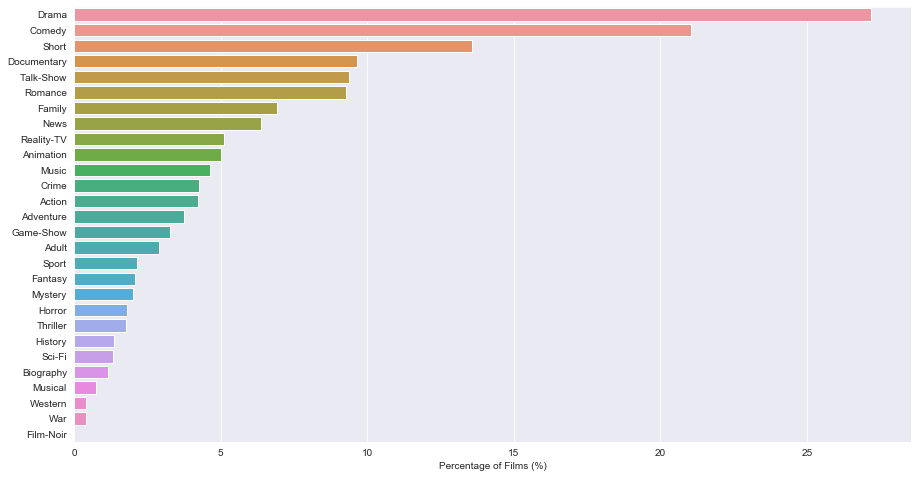

In [19]:
# Visualize kết quả bằng barchart:

data=pd.DataFrame.from_dict(data=genredict,orient='index')
data=data.sort_values(by=0,ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(x=data[0],y=data.index,orient='h')
plt.xlabel("Percentage of Films (%)")
plt.show()

Kết quả từ barchart cho thấy thể loại được sản xuất nhiều nhất là Drama (chiếm > 27%), theo đó là comedy, short và documentary

Tiếp theo, thử xem thời lượng phát sóng của từng loại chương trình được phát sóng như thế nào:

In [10]:
#Ta cần loại bỏ các giá trị không phải là số và các giá trị null ở cột nuntimeMinutes để visualize được cột này:

Titleimdb=Titleimdb[pd.to_numeric(Titleimdb['runtimeMinutes'],errors='coerce').notnull()]

Text(0.5, 1.0, 'Average runtime of types of Films (by minutes)')

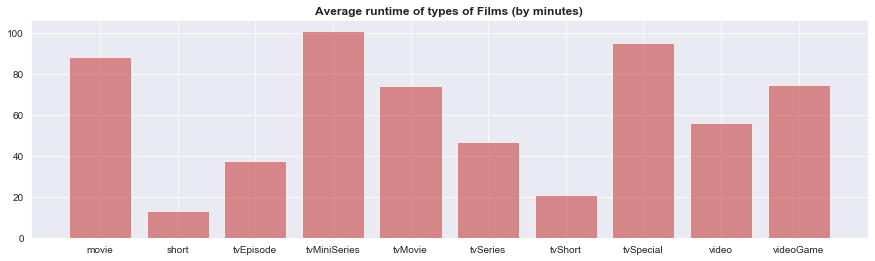

In [12]:
plt.figure(figsize=(15,4))
runtime=Titleimdb['runtimeMinutes'].astype(float).groupby(Titleimdb['titleType']).mean()
plt.bar(runtime.index,runtime.values,color='indianred',alpha=0.7)
plt.title('Average runtime of types of Films (by minutes)', fontweight='bold')

Kết quả cho thấy, thời lượng phát sóng trung bình dài nhất là tvMiniseries.  
Điều này thoạt nhìn có vẻ vô lý vì tvSeries lẽ ra mới là loại chương trình có thời lượng dài nhất. Tuy nhiên IMDB tổng hợp data theo cách: tvSeries tách riêng từng tập (kết quả là ta có các tvEpisode), thời lượng của loại này là trung bình thời lượng của tất cả các tập của phim đó (vậy nên runtime trung bình của tvSeries là ~50 mins). Trong khi đó tvMiniSeries lại không bị tách riêng các tập, vậy nên runtime của loại này dài nhất ~100 mins.

Movie có runtime khoảng 90 mins, trong khi tvShort và Short là 2 loại chương trình có thời lượng phát sóng ngắn nhất (10~20 mins).

## 2. Bảng title.akas.tsv.gz - Bao gồm các cột sau:
- titleId (string) - Cũng chính là cột tconst ở các bảng khác, là ID của từng phim
- ordering (integer) – Với 1 titleId sẽ có thể có nhiều dòng, cột ordering chính là thứ tự phân biệt giữa mỗi dòng trong cùng 1 titleId.
- title (string) – Tên địa phương của chương trình
- region (string) - Khu vực cho version hiện tại của chương trình.
- language (string) - Ngôn ngữ sử dụng của chương trình.
- types (array) - Một set liệt kê các thuộc tính cho tiêu đề thay thế này. Bao gồm 1 trong các giá trị: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". Giá trị mới có thể add thêm vào trong tương lai mà ko được báo trước.
- attributes (array) - Điều khoản bổ sung để mô tả tiêu đề thay thế này, không được liệt kê.
- isOriginalTitle (boolean) – 0: không phải tiêu đề chính thức; 1: là tiêu đề chính thức

In [3]:
TitleAkas = pd.read_csv(r"C:/Users/User/Desktop/Kaggle_movie_dataset/title.akas.tsv.gz",sep="\t",
                        low_memory=True, na_values=["\\N","nan"], compression='gzip', error_bad_lines = False)
TitleAkas

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0.0
1,tt0000001,2,Καρμενσίτα,GR,NaN,NaN,NaN,0.0
2,tt0000001,3,Карменсита,RU,NaN,NaN,NaN,0.0
3,tt0000001,4,Carmencita,US,NaN,NaN,NaN,0.0
4,tt0000001,5,Carmencita,NaN,NaN,original,NaN,1.0
...,...,...,...,...,...,...,...,...
19344166,tt9916852,3,Folge #3.20,DE,de,NaN,NaN,0.0
19344167,tt9916852,4,エピソード #3.20,JP,ja,NaN,NaN,0.0
19344168,tt9916852,5,Episódio #3.20,PT,pt,NaN,NaN,0.0
19344169,tt9916852,6,Episodio #3.20,IT,it,NaN,NaN,0.0


Bảng này gồm hơn 19 triệu dòng, nhiều hơn nhiều so với bảng TitleBasics, do 1 phim có thể có nhiều tiêu đề ứng với nhiều vùng và ngôn ngữ sử dụng khác nhau

In [3]:
TitleAkas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19344171 entries, 0 to 19344170
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   titleId          object 
 1   ordering         int64  
 2   title            object 
 3   region           object 
 4   language         object 
 5   types            object 
 6   attributes       object 
 7   isOriginalTitle  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ GB


Kiểm tra các giá trị có thể xuất hiện ở cột language và cột region:

In [4]:
TitleAkas.language.unique()

array([nan, 'sv', 'en', 'tr', 'es', 'sr', 'cs', 'fa', 'fr', 'bg', 'ca',
       'nl', 'qbn', 'pt', 'ru', 'qbp', 'ar', 'cmn', 'rn', 'bs', 'de',
       'hi', 'yi', 'qbo', 'uk', 'ka', 'hr', 'sl', 'he', 'tg', 'sk', 'kk',
       'el', 'fi', 'it', 'da', 'gsw', 'az', 'ms', 'pl', 'mr', 'uz', 'gl',
       'th', 'ta', 'eu', 'yue', 'af', 'la', 'hy', 'ur', 'bn', 'te', 'be',
       'lt', 'mk', 'et', 'gd', 'tl', 'lv', 'cy', 'id', 'qal', 'goh', 'ml',
       'ro', 'ja', 'hu', 'pa', 'no', 'is', 'sq', 'vi', 'ga', 'gu', 'ps',
       'nqo', 'sd', 'kn', 'xh', 'mi', 'wo', 'zu', 'rm', 'prs', 'ky',
       'fro', 'mn', 'lo', 'my', 'zh', 'am', 'qac', 'ku', 'ne', 'ko',
       'haw', 'myv', 'iu', 'st', 'tn', 'cr'], dtype=object)

In [5]:
TitleAkas.region.unique()

array(['HU', 'GR', 'RU', 'US', nan, 'FR', 'RO', 'GB', 'PT', 'ES', 'UY',
       'DE', 'IT', 'FI', 'RS', 'PL', 'AR', 'BR', 'XWW', 'DK', 'TR', 'XEU',
       'SK', 'CZ', 'SE', 'MX', 'XYU', 'AT', 'VE', 'CSHH', 'SI', 'JP',
       'AU', 'NL', 'NO', 'IR', 'UA', 'CA', 'CO', 'BG', 'BE', 'IN', 'DZ',
       'CH', 'NZ', 'BF', 'XWG', 'VN', 'SUHH', 'EE', 'IS', 'DDDE', 'HR',
       'XKO', 'CL', 'LT', 'EG', 'HK', 'BY', 'GE', 'BA', 'PE', 'PA', 'CN',
       'XSI', 'YUCS', 'IE', 'XSA', 'IL', 'CU', 'AL', 'BO', 'ZA', 'KR',
       'MY', 'SG', 'BUMM', 'XPI', 'BJ', 'PR', 'CM', 'AZ', 'TH', 'DO',
       'EC', 'LV', 'MA', 'GL', 'LI', 'LU', 'PH', 'ID', 'PY', 'MZ', 'BM',
       'TW', 'JM', 'MD', 'LB', 'IQ', 'TM', 'MK', 'CR', 'TN', 'NG', 'HT',
       'SN', 'GH', 'CI', 'JO', 'KG', 'PK', 'LK', 'GT', 'TJ', 'NE', 'GN',
       'VDVN', 'TD', 'SO', 'SD', 'MC', 'CG', 'TT', 'GA', 'BS', 'LY', 'SY',
       'AO', 'KH', 'SV', 'MR', 'AF', 'MG', 'ML', 'GY', 'CY', 'ET', 'XAS',
       'UZ', 'SR', 'MT', 'AM', 'TG', 'PG', 'MU', 'BI', 

Ta lại vẽ biểu đồ quạt thể hiện tỷ lệ phần trăm khu vực và ngôn ngữ sử dụng của các chương trình:

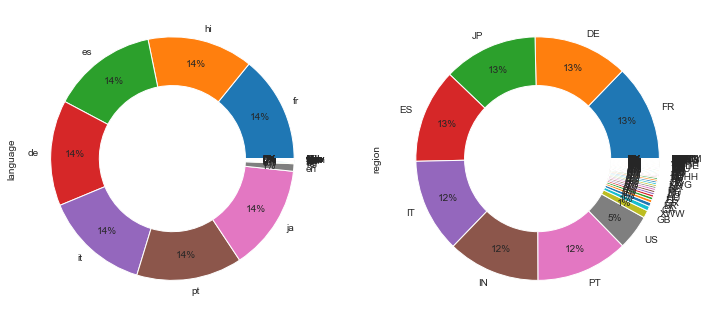

In [6]:
fig,(ax1,ax2)=plt.subplots(1,2)
TitleAkas.language.value_counts().plot.pie(autopct="%.0f%%",figsize=(12,12),pctdistance=0.8, wedgeprops=dict(width=0.4),ax=ax1)
TitleAkas.region.value_counts().plot.pie(autopct="%.0f%%",figsize=(12,12),pctdistance=0.8, wedgeprops=dict(width=0.4),ax=ax2)

- Về ngôn ngữ sử dụng, có thể thấy 7 ngôn ngữ sử dụng nhiều nhất được chia với tỷ lệ khá đều là 14%, đó là tiếng Pháp (fr), tiếng Hindi (hi - Ấn độ), Tây Ban Nha (es), Đức (de), Ý (it), Bồ Đào Nha (pt) và Nhật (ja).  
Ta không thấy tiếng Anh trong top này là vì nhiều phim có khai báo cột region, tuy nhiên cột language lại để trống và hệ thống trả về giá trị NaN. Đối với các trường hợp này, ngôn ngữ sử dụng được hiểu mặc định là tiếng Anh, đây là ngôn ngữ phổ biến nhất được sử dụng


- Về khu vực phát sóng của chương trình, ta cũng thấy một mức chia tương đối đồng đều ở top 4 khu vực chiếu nhiều nhất với tỷ lệ 13% đó là Pháp, Đức, Nhật, Tây Ban Nha. Mỹ chỉ chiếm 5% và Anh chiếm 1% tổng số chương trình được công chiếu.

Một cách để giải thích cho hiện tượng này như sau:

In [7]:
TitleAkas[TitleAkas['isOriginalTitle']==1].head(20)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
4,tt0000001,5,Carmencita,NaN,NaN,original,NaN,1.0
5,tt0000002,1,Le clown et ses chiens,NaN,NaN,original,NaN,1.0
14,tt0000003,4,Pauvre Pierrot,NaN,NaN,original,NaN,1.0
17,tt0000004,1,Un bon bock,NaN,NaN,original,NaN,1.0
30,tt0000005,8,Blacksmith Scene,NaN,NaN,original,NaN,1.0
36,tt0000006,5,Chinese Opium Den,NaN,NaN,original,NaN,1.0
38,tt0000007,2,Corbett and Courtney Before the Kinetograph,NaN,NaN,original,NaN,1.0
47,tt0000008,4,Edison Kinetoscopic Record of a Sneeze,NaN,NaN,original,NaN,1.0
50,tt0000009,1,Miss Jerry,NaN,NaN,original,NaN,1.0
54,tt0000010,11,La sortie de l'usine Lumière à Lyon,NaN,NaN,original,NaN,1.0


In [14]:
print(TitleAkas['region'].isnull().value_counts(), '\n')
print(TitleAkas['language'].isnull().value_counts())

False    18882125
True       462046
Name: region, dtype: int64 

False    16144344
True      3199827
Name: language, dtype: int64


Có thể thấy, tất cả các phim/chương trình được gắn mác là 'original' lại không khai báo cột region và language, đa số trong số các phim này đều sử dụng ngôn ngữ Anh và khu vực chiếu cũng không có gây ảnh hưởng đến kết quả trực quan hóa.

Tiếp theo, ta thử list ra top 20 phim điện ảnh phổ biến nhất (được thể hiện bởi số vùng/ngôn ngữ mà bộ phim này được trình chiếu và sử dụng). Cột ordering chính là số lượng khu vực/ngôn ngữ mà bộ phim này sử dụng.

In [16]:
Movie=TitleBasics[TitleBasics['titleType']=='movie']
Movie1=TitleAkas['ordering'].groupby(TitleAkas.titleId).max()
popdf=pd.merge(Movie,Movie1,left_on='tconst',right_on=Movie1.index)
popdf.sort_values(by='ordering',ascending=False).head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering
457050,tt8185052,movie,Mutant Virus,Mutant Virus,0,NaN,NaN,103,"Action,Adventure,Fantasy",98
55826,tt0076759,movie,Star Wars: Episode IV - A New Hope,Star Wars,0,1977.0,NaN,121,"Action,Adventure,Fantasy",85
457237,tt8232202,movie,Untitled Project,Untitled Project,0,NaN,NaN,NaN,"Action,Adventure,Fantasy",76
44134,tt0060196,movie,"The Good, the Bad and the Ugly","Il buono, il brutto, il cattivo",0,1966.0,NaN,161,Western,76
58429,tt0080684,movie,Star Wars: Episode V - The Empire Strikes Back,Star Wars: Episode V - The Empire Strikes Back,0,1980.0,NaN,124,"Action,Adventure,Fantasy",71
41727,tt0057012,movie,Dr. Strangelove or: How I Learned to Stop Worr...,Dr. Strangelove or: How I Learned to Stop Worr...,0,1964.0,NaN,95,Comedy,68
62176,tt0086190,movie,Star Wars: Episode VI - Return of the Jedi,Star Wars: Episode VI - Return of the Jedi,0,1983.0,NaN,131,"Action,Adventure,Fantasy",68
19882,tt0029583,movie,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,0,1937.0,NaN,83,"Animation,Family,Fantasy",67
63515,tt0088247,movie,The Terminator,The Terminator,0,1984.0,NaN,107,"Action,Sci-Fi",66
52272,tt0071562,movie,The Godfather: Part II,The Godfather: Part II,0,1974.0,NaN,202,"Crime,Drama",65


## 3. Bảng title.principals.tsv.gz – Bao gồm các thông tin liên quan đến dàn cast/đội ngũ sản xuất của phim:
- tconst (string) - ID riêng của từng chương trình.
- ordering (integer) –  Với 1 tconst sẽ có thể có nhiều dòng, cột ordering chính là thứ tự phân biệt giữa mỗi dòng trong cùng 1 tconst.
- nconst (string) - ID riêng của từng người liên quan đến phim
- category (string) - loại công việc mà người đó tham gia vào
- job (string) - Chức vụ công việc cụ thể của người đó (nếu có)
- characters (string) - tên của nhân vật mà diễn viên đóng trong phim

In [2]:
TitlePrincipals = pd.read_csv(r"C:/Users/User/Desktop/Kaggle_movie_dataset/title.principals.tsv.gz",sep="\t", 
                              low_memory=True, na_values=["\\N","nan"], compression='gzip', error_bad_lines = False)
TitlePrincipals

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Herself""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0374658,cinematographer,director of photography,NaN
3,tt0000002,1,nm0721526,director,NaN,NaN
4,tt0000002,2,nm1335271,composer,NaN,NaN
...,...,...,...,...,...,...
36499699,tt9916880,5,nm0996406,director,principal director,NaN
36499700,tt9916880,6,nm1482639,writer,NaN,NaN
36499701,tt9916880,7,nm2586970,writer,books,NaN
36499702,tt9916880,8,nm1594058,producer,producer,NaN


Bảng TitlePrincipals này còn nhiều dòng hơn 2 bảng trước rất nhiều (36 triệu dòng so với 6 triệu và 19 triệu dòng), do 1 bộ phim sản xuất ra phải bao gồm 1 đội ngũ rất nhiều thành viên liên quan đến sản xuất, từ đạo diễn, diễn viên, biên kịch, quay phim,...

Bảng sau show ra top 10 vị trí công việc phổ biến của các thành viên liên quan đến chương trình được sản xuất:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

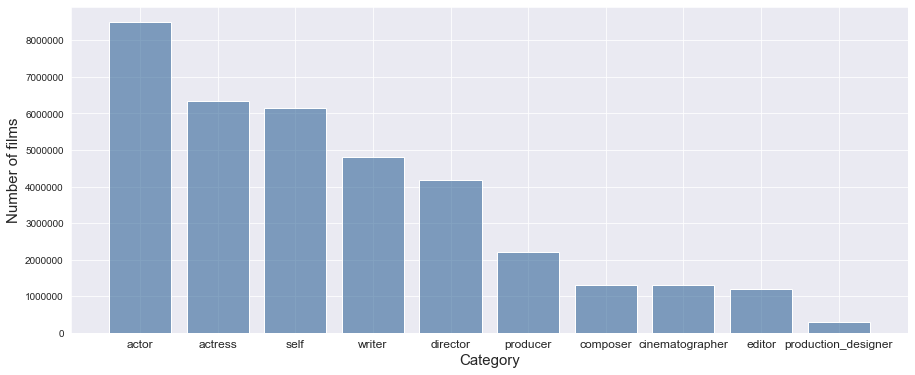

In [8]:
plt.figure(figsize=(15,6))
df=TitlePrincipals.category.value_counts().head(10)
plt.bar(df.index,df.values,color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('Category',fontsize=15)
plt.ylabel('Number of films', fontsize=15)
plt.xticks(fontsize=12)

Từ barchart ta thấy vị trí công việc phổ biến nhất và actor và actress, 'self' đứng thứ 3 ở đây ám chỉ những người diễn vai chính họ trong phim/chương trình.

## 4. Bảng name.basics.tsv.gz – Bao gồm các thông tin liên quan đến người:
- nconst (string) - ID riêng của từng người liên quan đến phim
- primaryName (string)– tên chính thức của người đó
- birthYear – năm sinh, format YYYY
- deathYear – năm mất (nếu có), format YYYY
- primaryProfession (array of strings)– 3 chuyên môn chính của người đó
- knownForTitles (array of tconsts) – ID của các chương trình người này tham gia

In [3]:
NameBasics = pd.read_csv(r"C:/Users/User/Desktop/Kaggle_movie_dataset/name.basics.tsv.gz",sep="\t", 
                         low_memory=True, na_values=["\\N","nan"], compression='gzip',error_bad_lines = False)
NameBasics

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0050419,tt0053137,tt0043044,tt0072308"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0117057,tt0037382,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0059956,tt0054452,tt0057345"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,soundtrack","tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976"
...,...,...,...,...,...,...
9711017,nm9993714,Romeo del Rosario,NaN,NaN,"animation_department,art_department",tt2455546
9711018,nm9993716,Essias Loberg,NaN,NaN,NaN,NaN
9711019,nm9993717,Harikrishnan Rajan,NaN,NaN,cinematographer,tt8736744
9711020,nm9993718,Aayush Nair,NaN,NaN,cinematographer,NaN


Bảng sau show ra top 20 người bận rộn nhất (tức người này tham gia vào nhiều dự án chương trình/phim nhất):

In [10]:
df1=pd.DataFrame()
df1['nconst']=TitlePrincipals['nconst'].value_counts().head(20).index
df1['count']=TitlePrincipals['nconst'].value_counts().head(20).values
pd.merge(df1, NameBasics[['primaryName','nconst','primaryProfession']], on='nconst')

,nconst,count,primaryName,primaryProfession
0,nm0438471,16465,Ekta Kapoor,"producer,writer,director"
1,nm0914844,13424,Reg Watson,"writer,producer,director"
2,nm0438506,12766,Shobha Kapoor,"producer,writer"
3,nm0251041,12444,Michael Egizi,"composer,music_department,soundtrack"
4,nm1916590,10891,Joel Beckerman,"composer,music_department,producer"
5,nm0912726,9892,Tony Warren,"writer,actor"
6,nm0318114,8536,Johnny Gilbert,actor
7,nm0068589,8496,William J. Bell,"writer,producer,miscellaneous"
8,nm0022172,8415,Ernesto Alonso,"producer,actor,cinematographer"
9,nm0275585,8408,Delia Fiallo,"writer,actress"


Kết quả số chương trình tham gia được thể hiện ở cột 'count'. Ta thấy người đầu tiên là người tham gia nhiều nhất đến 16465 chương trình, tức giả sử người này sống 100 năm thì mỗi năm tham gia vào 1646 chương trình (?!), con số này là quá lớn.  
Để kiểm tra độ chính xác của kết quả, ta thử list ra 20 chương trình mà người này tham gia trong 1 năm bất kỳ:

In [12]:
#df2=TitlePrincipals[TitlePrincipals['nconst']=='nm0438471']
#namedf=pd.merge(df2,TitleBasics[['originalTitle','tconst','startYear']],on='tconst')
namedf[namedf['startYear']==2008].sort_values(by='originalTitle',ascending=False).head(20)

,tconst,ordering,nconst,category,job,characters,originalTitle,startYear
5682,tt6352622,4,nm0438471,writer,creator,NaN,Kartika,2008.0
9312,tt9396678,7,nm0438471,writer,creator,NaN,Episode #1.99,2008.0
9311,tt9396674,7,nm0438471,writer,creator,NaN,Episode #1.98,2008.0
8071,tt9375316,6,nm0438471,writer,NaN,NaN,Episode #1.97,2008.0
9309,tt9396670,7,nm0438471,writer,creator,NaN,Episode #1.97,2008.0
8070,tt9375314,6,nm0438471,writer,NaN,NaN,Episode #1.96,2008.0
9310,tt9396672,7,nm0438471,writer,creator,NaN,Episode #1.96,2008.0
9308,tt9396668,7,nm0438471,writer,creator,NaN,Episode #1.95,2008.0
9307,tt9396666,7,nm0438471,writer,creator,NaN,Episode #1.94,2008.0
8069,tt9375310,6,nm0438471,writer,NaN,NaN,Episode #1.94,2008.0


Nhìn vào bảng có thể thấy mỗi chương trình người này tham gia đều là các tập khác nhau của 1 series phim/chương trình với các vị trí công việc khác nhau như: writer, producer,...nhiều series phim/chương trình dài tập có thể dài tới hàng trăm hoặc nghìn tập cho cả quá trình.    
Như vậy con số 1646 chương trình/năm cũng không phải vô lý.

Tiếp theo, ta sẽ thống kê vòng đời của những người tham gia đóng góp cho phim (những người có đầy đủ ngày sinh, ngày mất trong quá khứ):

In [13]:
#Tạo bảng mới gồm các cột tên, năm sinh, năm mất và tuổi đời (Lifespan):

Agedf=NameBasics[['primaryName','birthYear','deathYear']].dropna()
Agedf['Lifespan']=Agedf.deathYear-Agedf.birthYear
Agedf['Lifespan']=Agedf['Lifespan'][(Agedf['Lifespan']>0) & (Agedf['Lifespan']<200)]
Agedf

,primaryName,birthYear,deathYear,Lifespan
0,Fred Astaire,1899.0,1987.0,88.0
1,Lauren Bacall,1924.0,2014.0,90.0
3,John Belushi,1949.0,1982.0,33.0
4,Ingmar Bergman,1918.0,2007.0,89.0
5,Ingrid Bergman,1915.0,1982.0,67.0
...,...,...,...,...
9710745,Nick 'Duffy' Fudge,1989.0,2018.0,29.0
9710750,Albert Minns,1920.0,1985.0,65.0
9710751,Richard Blackmarr,1929.0,2013.0,84.0
9710752,William Riva,1919.0,1999.0,80.0


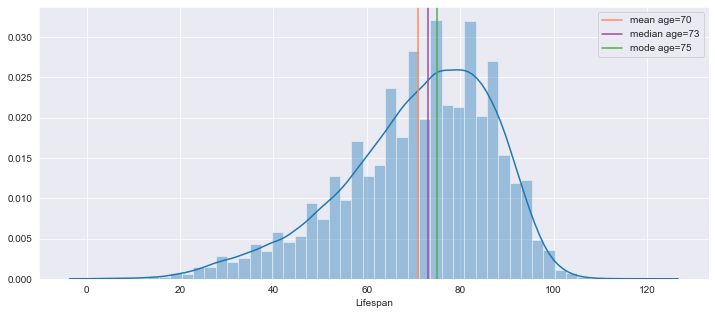

In [15]:
#Vẽ biểu đồ histogram và KDE:

plt.figure(figsize=(12,5))
plot=sns.distplot(Agedf['Lifespan'])
mean=Agedf['Lifespan'].mean()
median=Agedf['Lifespan'].median()
mode=Agedf['Lifespan'].mode()[0]
plot.axvline(x=mean,c=sns.color_palette("Set2")[1],label=f"mean age={int(mean)}")
plot.axvline(x=median,c=sns.color_palette("Set1")[3],label=f"median age={int(median)}")
plot.axvline(x=mode,c=sns.color_palette("Set1")[2],label=f"mode age={int(mode)}")
plt.legend()

Biểu đồ cho thấy sự phân phối không chuẩn, hình dạng đường cong KDE nghiêng về bên phải với Mean<Median<Mode.  
Mean=70 thể hiện độ tuổi trung bình là 70, trong khi độ tuổi thường gặp nhất là 75 tuổi, độ tuổi này tương đối cao thể hiện mức sống tốt của những người làm trong ngành công nghiệp phim ảnh.

Sau đây ta sẽ xem xét đến top 10 người sống lâu nhất trong lĩnh vực này:

In [16]:
Agedf.sort_values(by='Lifespan',ascending=False).head(10)

,primaryName,birthYear,deathYear,Lifespan
124642,Jeanne Louise Calment,1875.0,1997.0,122.0
231126,Tatzumbia Dupea,1849.0,1970.0,121.0
4908010,Fakir Lalon Shah,1772.0,1890.0,118.0
3646934,Misao Ogawa,1898.0,2015.0,117.0
262234,Gustave Field,1896.0,2012.0,116.0
2781960,Maria De Jesus,1893.0,2009.0,116.0
3747692,Edna Parker,1893.0,2008.0,115.0
7241727,Ethel Lang,1900.0,2015.0,115.0
4112854,Gertrude Baines,1894.0,2009.0,115.0
3469648,Tomoji Tanabe,1895.0,2009.0,114.0


Ta thấy người sống thọ nhất trong list là Jeanne Louise Calment, bà là người được xem là sống thọ nhất được chứng thực. Xem thêm tại https://vi.wikipedia.org/wiki/Jeanne_Calment.  
Mặc dù bà không tham gia vào lĩnh vực phim ảnh, nhưng cuộc đời bà đã được làm thành nhiều bộ phim tài liệu nhờ vào việc sống thọ của mình. Đây là lí do vì sao bà lại có mặt trong dataset này.

## 5. Bảng title.ratings.tsv.gz – Bao gồm các thông tin liên quan đến ratings của phim:
- tconst (string) - ID riêng của từng chương trình
- averageRating – Trung bình trọng số ratings của tất cả người dùng.
- numVotes - Số lượt đánh giá của mỗi chương trình.

In [17]:
TitleRatings = pd.read_csv(r"C:/Users/User/Desktop/Kaggle_movie_dataset/title.ratings.tsv.gz",sep="\t", 
                           low_memory=True, na_values=["\\N","nan"], compression='gzip', error_bad_lines = False)
TitleRatings

,tconst,averageRating,numVotes
0,tt0000001,5.6,1550
1,tt0000002,6.1,186
2,tt0000003,6.5,1207
3,tt0000004,6.2,113
4,tt0000005,6.1,1934
...,...,...,...
993816,tt9916576,5.9,7
993817,tt9916578,9.1,11
993818,tt9916720,5.1,41
993819,tt9916766,6.7,11


Ta sẽ merge bảng này với bảng TitleBasics để lấy thêm các thông tin liên quan đến năm sản xuất, số lượng phim,...

In [19]:
merged_temp = pd.merge(TitleRatings,TitleBasics,on="tconst",how="left")
merged_temp = merged_temp[(merged_temp.startYear.notnull())&(merged_temp.startYear<2020)]
merged_temp

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.6,1550,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,6.1,186,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,6.5,1207,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,6.2,113,short,Un bon bock,Un bon bock,0,1892.0,NaN,NaN,"Animation,Short"
4,tt0000005,6.1,1934,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...
993816,tt9916576,5.9,7,tvEpisode,Destinee's Story,Destinee's Story,0,2019.0,NaN,85,Reality-TV
993817,tt9916578,9.1,11,tvEpisode,The Trial of Joan Collins,The Trial of Joan Collins,0,2019.0,NaN,NaN,"Adventure,Biography,Comedy"
993818,tt9916720,5.1,41,short,The Nun 2,The Nun 2,0,2019.0,NaN,10,"Comedy,Horror,Mystery"
993819,tt9916766,6.7,11,tvEpisode,Episode #10.15,Episode #10.15,0,2019.0,NaN,43,"Family,Reality-TV"


Tạo bảng tổng hợp theo năm, trong đó:
- (averageRating, median): điểm ratings trung bình của tất cả phim sản xuất trong năm
- (numVotes, sum): Tổng số lượng vote của all phim của năm đó
- (numVotes, size): Tổng số lượng phim được sản xuất trong năm đó
- (numVotes, <lambda_0>): Số lượng vote trung bình trên 1 phim của năm đó

In [20]:
counts_yearly = merged_temp.groupby("startYear").agg({"averageRating":[np.median], 
                                                      "numVotes":[np.sum,np.size,lambda x:np.sum(x)/np.size(x)]})
counts_yearly

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in longlong_scalars
  


averageRating  numVotes                    
                 median       sum   size   <lambda_0>
startYear                                            
1874.0              7.0      1013      1  1013.000000
1878.0              7.4      2063      1  2063.000000
1881.0              5.2       144      1   144.000000
1883.0              6.4       590      1   590.000000
1885.0              5.3       101      1   101.000000
...                 ...       ...    ...          ...
2015.0              7.3  37347245  43769   853.280747
2016.0              7.4  37918001  46482   815.756658
2017.0              7.4  33263002  45595   729.531791
2018.0              7.4  25966369  42782   606.946122
2019.0              7.5  15386639  30197   509.541974

[138 rows x 4 columns]

Vẽ biểu đồ đường thể hiện các thông tin trong bảng trên:

Text(0.5, 1.0, 'Average Number of Votes per Film per Year')

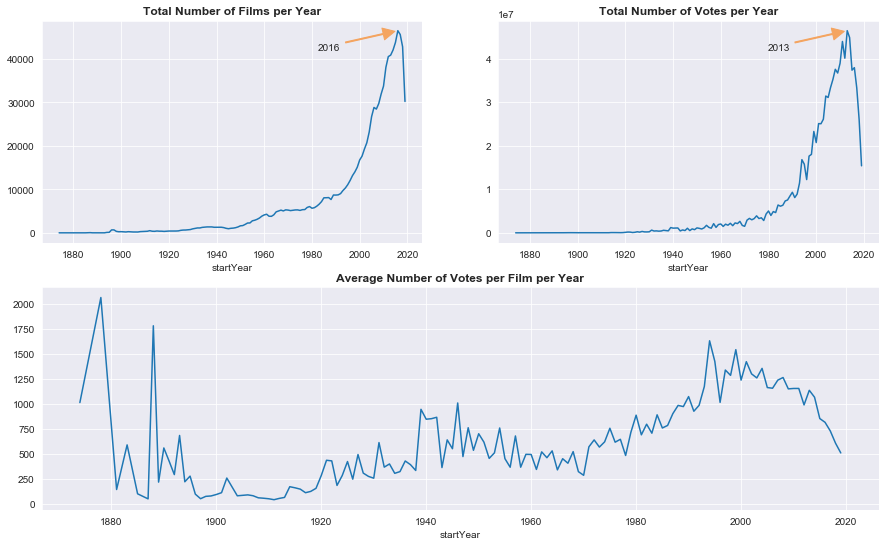

In [21]:
#Năm có số lượng phim sản xuất nhiều nhất và số lượng vote nhiều nhất:
Max_film_year=int(counts_yearly[('numVotes','size')].idxmax())
Max_vote_year=int(counts_yearly[('numVotes','sum')].idxmax())

#set kích cỡ cho figure:
plt.figure(figsize=(15,9))

#3 biểu đồ được vẽ trong cùng 1 figure
#Biểu đồ 1: Tổng số phim được sản xuất theo năm:
plt.subplot(2,2,1)
counts_yearly[('numVotes','size')].plot()
plt.title("Total Number of Films per Year",fontweight="bold")
plt.annotate(s=Max_film_year,
             xy=(Max_film_year,counts_yearly[('numVotes','size')].max()),
             xytext=(-80,-20),
             textcoords='offset points',
             arrowprops=dict(color="sandybrown",shrink=0.05,width=1))

#Biểu đồ 2: Tổng số phiếu bình chọn theo năm:
plt.subplot(2,2,2)
counts_yearly[('numVotes','sum')].plot()
plt.title("Total Number of Votes per Year",fontweight="bold")
plt.annotate(s=Max_vote_year,
             xy=(Max_vote_year,counts_yearly[('numVotes','sum')].max()),
             xytext=(-80,-20),
             textcoords='offset points',
             arrowprops=dict(color="sandybrown",shrink=0.05,width=1))

#Biểu đồ 3: Số vote trung bình/phim/năm:
plt.subplot(2,1,2)
counts_yearly[('numVotes','<lambda_0>')].plot()
plt.title("Average Number of Votes per Film per Year",fontweight="bold")


- $1st subplot$: Số phim trung bình sản xuất trên 1 năm: Ta có thể thấy với sự tiến bộ của khoa học công nghệ, kỹ thuật dựng phim ngày càng phong phú thì số lượng phim được sản xuất ngày càng nhiều và đạt đỉnh điểm năm 2016. Tuy nhiên từ sau giai đoạn này, hình thức làm phim/video cũng ngày càng phong phú đáp ứng nhu cầu giải trí mọi lúc mọi nơi của người dùng, 1 số lượng lớn trong số đó không được thống kê trên các website chỉ dành cho làm phim chuyên nghiệp như IMDB. Người ta có xu hướng thích xem những video giải trí ngắn như video facebook, youtube, hay các nền tảng mạng xã hội khác thay vì xem truyền hình, đây được xem là lí do chính dẫn tới số lượng chương trình được sản xuất sau giai đoạn 2016 giảm mạnh.
- $2nd subplot$: Tương tự như plot thứ nhất, nhờ tiến bộ của khoa học công nghệ mà khả năng tiếp cận các trang đánh giá phim của người dùng ngày càng nhiều, số lượng vote nhìn chung tăng theo năm và đạt đỉnh điểm năm 2013 nhưng lại giảm mạnh cho tới hiện tại.
- $3rd subplot$: Biểu đồ này thể hiện số lượng vote trung bình/phim/năm, số lượng này có sự biến động giữa các năm, đặc biệt từ năm 2013, số lượng vote/phim giảm hẳn.

Một vài lý do có thể giải thích cho 2 subplot này như sau:
    - Từ subplot thứ nhất có thể thấy tổng số chương trình sản xuất giảm => Tổng số vote cũng giảm theo
    - Số lượng và thể loại phim sản xuất ngày càng phong phú dẫn đến chất lượng phim theo mặt bằng chung không còn tốt như  trước kia, dẫn tới số lượng vote/phim giảm.
    - IMDB không còn phổ biến như trước kia do sự nổi nên của nhiều trang film review uy tín khác như Rotten Tomatoes,           Guardians, Metacritic,...

Bảng tiếp theo show ra top 10 phim có số lượt vote nhiều nhất trên IMDB website:

In [22]:
merged_temp.sort_values(by='numVotes',ascending=False).head(10)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
80581,tt0111161,9.3,2160364,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994.0,NaN,142,Drama
241023,tt0468569,9.0,2135266,movie,The Dark Knight,The Dark Knight,0,2008.0,NaN,152,"Action,Crime,Drama"
516022,tt1375666,8.8,1893504,movie,Inception,Inception,0,2010.0,NaN,148,"Action,Adventure,Sci-Fi"
96692,tt0137523,8.8,1725939,movie,Fight Club,Fight Club,0,1999.0,NaN,139,Drama
80365,tt0110912,8.9,1695672,movie,Pulp Fiction,Pulp Fiction,0,1994.0,NaN,154,"Crime,Drama"
79503,tt0109830,8.8,1663131,movie,Forrest Gump,Forrest Gump,0,1994.0,NaN,142,"Drama,Romance"
413522,tt0944947,9.4,1606675,tvSeries,Game of Thrones,Game of Thrones,0,2011.0,2019.0,57,"Action,Adventure,Drama"
94662,tt0133093,8.7,1554836,movie,The Matrix,The Matrix,0,1999.0,NaN,136,"Action,Sci-Fi"
88336,tt0120737,8.8,1549334,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001.0,NaN,178,"Adventure,Drama,Fantasy"
111189,tt0167260,8.9,1534048,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003.0,NaN,201,"Adventure,Drama,Fantasy"


9/10 phim đều là phim chiếu rạp, chỉ duy nhất 1 series phim truyền hình lọt vào top này là 'Game of Thrones' với số lượng vote là 1,6 triệu lượt.  
Đây đều là những phim có điểm rating rất cao và rất đáng xem.

Bây giờ ta sẽ xem xét đến top 10 phim có điểm rating cao nhất (với điều kiện các phim này có số vote tối thiểu là 30K):

In [23]:
merged_temp[merged_temp.numVotes>30000].sort_values(by='averageRating',ascending=False).head(10)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
653332,tt2301451,10.0,108673,tvEpisode,Ozymandias,Ozymandias,0,2013.0,NaN,48,"Crime,Drama,Thriller"
755163,tt3866850,9.9,85717,tvEpisode,Hardhome,Hardhome,0,2015.0,NaN,61,"Action,Adventure,Drama"
776789,tt4283088,9.9,182876,tvEpisode,Battle of the Bastards,Battle of the Bastards,0,2016.0,NaN,60,"Action,Adventure,Drama"
979249,tt9166696,9.9,47691,tvEpisode,Vichnaya Pamyat,Vichnaya Pamyat,0,2019.0,NaN,72,"Drama,History,Thriller"
569219,tt1683088,9.9,36813,tvEpisode,Face Off,Face Off,0,2011.0,NaN,51,"Crime,Drama,Thriller"
638397,tt2178784,9.9,85010,tvEpisode,The Rains of Castamere,The Rains of Castamere,0,2013.0,NaN,51,"Action,Adventure,Drama"
653334,tt2301455,9.9,78654,tvEpisode,Felina,Felina,0,2013.0,NaN,55,"Crime,Drama,Thriller"
776790,tt4283094,9.9,126960,tvEpisode,The Winds of Winter,The Winds of Winter,0,2016.0,NaN,68,"Action,Adventure,Drama"
852514,tt5775846,9.8,77887,tvEpisode,The Spoils of War,The Spoils of War,0,2017.0,NaN,50,"Action,Adventure,Drama"
633305,tt2140553,9.8,41588,videoGame,The Last of Us,The Last of Us,0,2013.0,NaN,NaN,"Action,Adventure,Drama"


Trong khi bảng trên top 10 phim hầu hết đều là phim điện ảnh thì trong bảng này, đa số các phim được đánh giá cao lại là các tập phim riêng lẻ của các series phim truyền hình nổi tiếng như:
- tvSeries 'Breaking Bad': Các tập Ozymandias, Faceoff, Felina
- tvSeries 'Game of Thrones': Các tập The Winds of Winter, Battle of the Bastards, Hardhome, The Rains of Castanere, The Spoils of War

Ta cũng đồng thời thống kê 10 phim có ratings thấp nhất (điều kiện số vote >30K):

In [24]:
merged_temp[merged_temp.numVotes>30000].sort_values(by='averageRating',ascending=True).head(10)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
918852,tt7221896,1.0,37270,movie,Cumali Ceber: Allah Seni Alsin,Cumali Ceber: Allah Seni Alsin,0,2017.0,NaN,100,Comedy
864079,tt5988370,1.4,71994,movie,Reis,Reis,0,2017.0,NaN,108,"Biography,Drama"
572430,tt1702443,1.6,75028,movie,Justin Bieber: Never Say Never,Justin Bieber: Never Say Never,0,2011.0,NaN,105,"Documentary,Music"
37909,tt0060666,1.9,33874,movie,Manos: The Hands of Fate,Manos: The Hands of Fate,0,1966.0,NaN,70,Horror
374318,tt0804492,1.9,35612,movie,The Hottie & the Nottie,The Hottie & the Nottie,0,2008.0,NaN,91,"Comedy,Romance"
482480,tt1213644,1.9,84215,movie,Disaster Movie,Disaster Movie,0,2008.0,NaN,87,Comedy
180334,tt0317676,2.0,35073,movie,House of the Dead,House of the Dead,0,2003.0,NaN,90,"Action,Adventure,Horror"
926516,tt7431594,2.0,30086,movie,Race 3,Race 3,0,2018.0,NaN,160,"Action,Thriller"
197257,tt0362165,2.2,49973,movie,Son of the Mask,Son of the Mask,0,2005.0,NaN,94,"Comedy,Family,Fantasy"
678285,tt2574698,2.3,56680,movie,Gunday,Gunday,0,2014.0,NaN,152,"Action,Drama,Romance"
